# load evaluation data

In [1]:
import json

def load_responses(path):
    data = []
    
    with open(path, 'r') as f:
        for line in f:
            data.append(json.loads(line))
            
    return data



In [11]:
from glob import glob
import pandas as pd


res_files = glob('data/eval/*.json')

res_df_list = []

for f in res_files:
    model_name = f.split('/')[-1].replace(".json", "")
    correct = 0
    sra = 0
    resps = load_responses(f)
    for r in resps:
        if r['strategy'] == r['inferred_strategy']:
            correct += 1
        sra += r['sra']
    res_df_list.append({
        'acc': correct/len(resps),
        'model': model_name,
        'sra': sra/len(resps)
    })

df = pd.DataFrame(res_df_list)

In [13]:
import numpy as np

np.corrcoef(df['acc'], df['sra'])

array([[1.        , 0.36089356],
       [0.36089356, 1.        ]])

<Axes: xlabel='acc', ylabel='sra'>

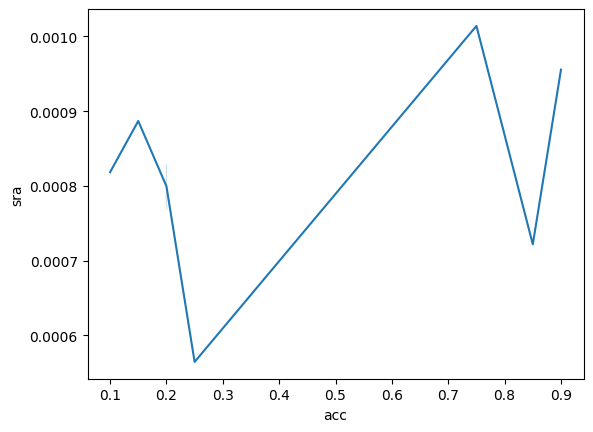

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(df, x='acc', y='sra')